<a href="https://colab.research.google.com/github/JFrankVC/tog/blob/main/Monthly_MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount the Google Drive
# Allow access - check steps and methods in: https://neptune.ai/blog/google-colab-dealing-with-files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # if Colab root directory is shown, go to /content folder

Mounted at /content/drive


In [2]:
# How to install permanently non-preinstalled libraries
!pip install earthpy && touch /root/.ipython/profile_default/startup/00-first.py && echo "import earthpy" >> /root/.ipython/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 64.1 MB/s eta 0:00:00


In [3]:
!pip install pyhdf && touch /root/.ipython/profile_default/startup/00-first.py && echo "import pyhdf" >> /root/.ipython/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.4/771.4 kB 2.3 MB/s eta 0:00:00


In [4]:
# Import packages
import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import numpy.ma as ma
import xarray as xr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import pandas as pd

# Import package pyhdf for reading HDF files (method used in local code)
from pyhdf.SD import SD, SDC
import numpy as np

from osgeo import gdal
xr.set_options(display_style='html')

In [5]:
# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

# Change the directory - Google Drive
path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean/"
os.chdir(path)

# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

Current working directory /content
Current working directory /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean


In [6]:
# Set path to Dataset folder
folder_path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean/"

In [7]:
# List all year folders in current folder
a = !ls

In [8]:
years = [f for f in os.listdir()]

In [9]:
years

['2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [10]:
years = np.array(years)
years

array(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'], dtype='<U4')

### 2012

In [11]:
# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

# Change the directory - Google Drive
path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean/2012/"
os.chdir(path)

# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

Current working directory /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean
Current working directory /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean/2012


In [12]:
# List all datasets for year 2012 in current folder
!ls

MOD08_M3.A2012001.061.2017332005900.psgscs_000502050761.hdf
MOD08_M3.A2012032.061.2017332052720.psgscs_000502050761.hdf
MOD08_M3.A2012061.061.2017332125551.psgscs_000502050761.hdf
MOD08_M3.A2012092.061.2017333070458.psgscs_000502050761.hdf
MOD08_M3.A2012122.061.2017334103546.psgscs_000502050761.hdf
MOD08_M3.A2012153.061.2017335121954.psgscs_000502050761.hdf
MOD08_M3.A2012183.061.2017336234843.psgscs_000502050761.hdf
MOD08_M3.A2012214.061.2017338084514.psgscs_000502050761.hdf
MOD08_M3.A2012245.061.2017339022214.psgscs_000502050761.hdf
MOD08_M3.A2012275.061.2017339215337.psgscs_000502050761.hdf
MOD08_M3.A2012306.061.2017340192241.psgscs_000502050761.hdf
MOD08_M3.A2012336.061.2017341184807.psgscs_000502050761.hdf


In [13]:
# Set path to Dataset folder
folder_path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean/2012/"

In [14]:
# Read all datasets from folder
parent_path = folder_path
files = os.listdir(parent_path)
NUM_DATASETS = len(files)
if any(".txt" in s for s in files):     # Check how many files are not HDF dataframes
    matching = [s for s in files if ".txt" in s]
    n_readmes = len(matching)
    NUM_DATASETS = NUM_DATASETS - n_readmes
    n_readmes = None
    matching = None
print(f"Files in folder: {files}")
print(f"Num files in folder: {NUM_DATASETS}")

Files in folder: ['MOD08_M3.A2012001.061.2017332005900.psgscs_000502050761.hdf', 'MOD08_M3.A2012032.061.2017332052720.psgscs_000502050761.hdf', 'MOD08_M3.A2012061.061.2017332125551.psgscs_000502050761.hdf', 'MOD08_M3.A2012092.061.2017333070458.psgscs_000502050761.hdf', 'MOD08_M3.A2012153.061.2017335121954.psgscs_000502050761.hdf', 'MOD08_M3.A2012183.061.2017336234843.psgscs_000502050761.hdf', 'MOD08_M3.A2012214.061.2017338084514.psgscs_000502050761.hdf', 'MOD08_M3.A2012245.061.2017339022214.psgscs_000502050761.hdf', 'MOD08_M3.A2012275.061.2017339215337.psgscs_000502050761.hdf', 'MOD08_M3.A2012306.061.2017340192241.psgscs_000502050761.hdf', 'MOD08_M3.A2012336.061.2017341184807.psgscs_000502050761.hdf', 'MOD08_M3.A2012122.061.2017334103546.psgscs_000502050761.hdf']
Num files in folder: 12


In [15]:
DATAFIELD_NAME='Aerosol_Optical_Depth_Land_Mean_Mean'
scaling_not_read = True

ds_aod_twelve_months = []

for i in range(NUM_DATASETS):
    #print(i)
    path = parent_path + files[i]
    #print(f"File path i={i}: {path}")

    if (".hdf" in path):    # Ignore README files
        # Read file
        file = SD(path, SDC.READ,)

        if (scaling_not_read):
            SCALING = file.select(DATAFIELD_NAME).attributes()['scale_factor']
            scaling_not_read = True

        #print(f"File Info: {file.info()}\n")
        #print(f"File Datasets: {file.datasets()}\n")

        # Extract AOD Land Ocean into a pyHDF Dataset
        ds_i = file.select(DATAFIELD_NAME)

        # Get array values (pixels)
        arr_i = ds_i[:, :]

        # Use _FillValue (-9999.0) and set it to NaN for better visualization
        arr_i[arr_i == int(-9999)] = 0

        ds_aod_twelve_months.append(arr_i)

In [16]:
ds_aod_twelve_months = np.array(ds_aod_twelve_months)

In [17]:
# Use scaling factor
ds_aod_twelve_months = ds_aod_twelve_months * SCALING

In [18]:
file.datasets()

{'Aerosol_Optical_Depth_Land_Mean_Mean': (('Corrected_Optical_Depth_Land_Micron_Levels:mod08',
   'YDim:mod08',
   'XDim:mod08'),
  (3, 19, 31),
  22,
  0)}

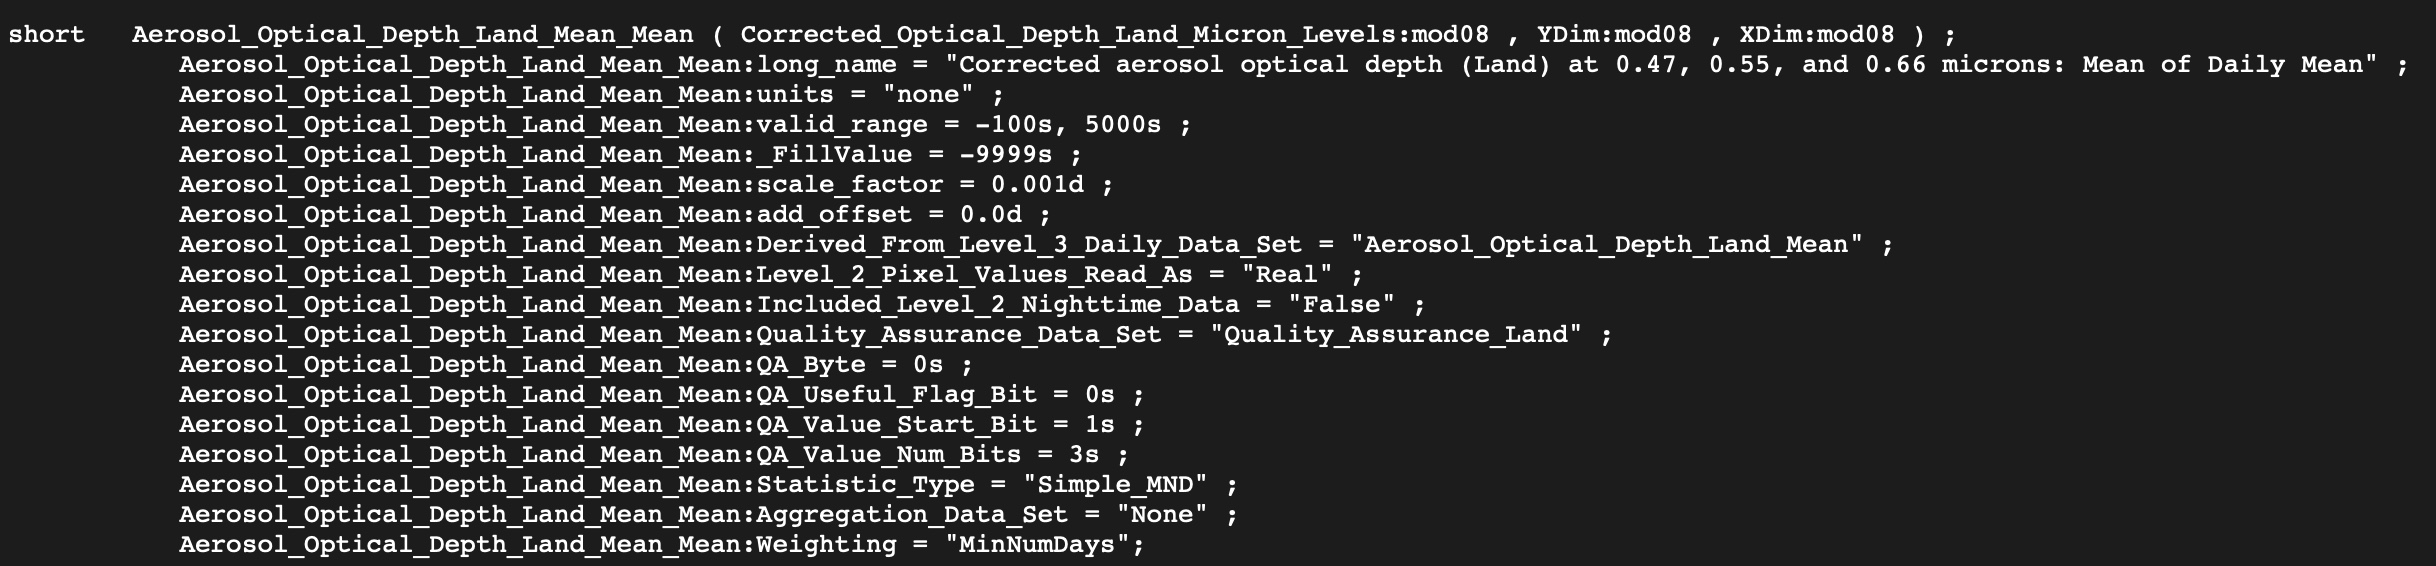

In [19]:
NUM_DATASETS = len(ds_aod_twelve_months)
print(f"Num datasets = {NUM_DATASETS}")
print(ds_aod_twelve_months[0].shape)
print(type(ds_aod_twelve_months[0]))

Num datasets = 12
(3, 19, 31)
<class 'numpy.ndarray'>


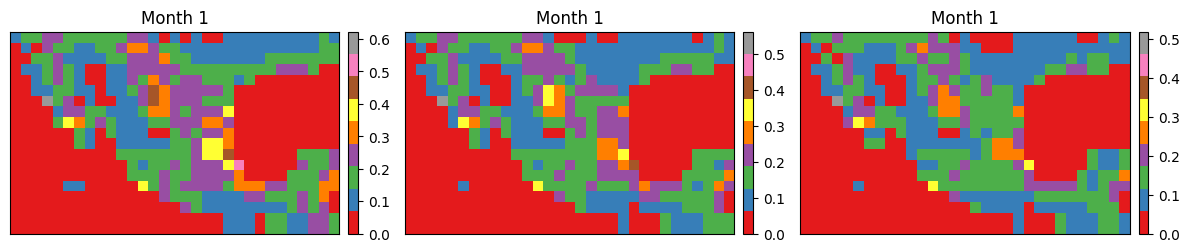

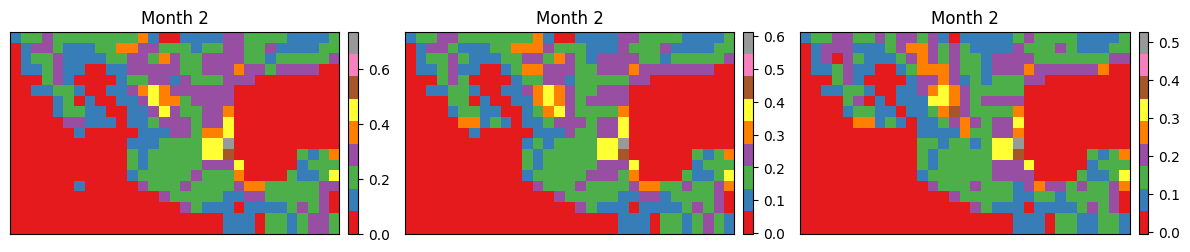

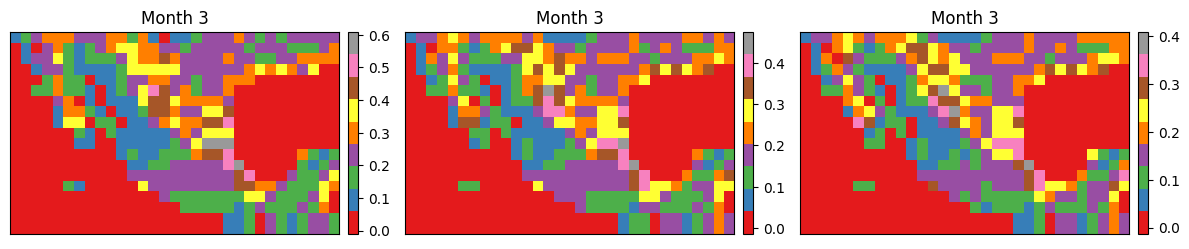

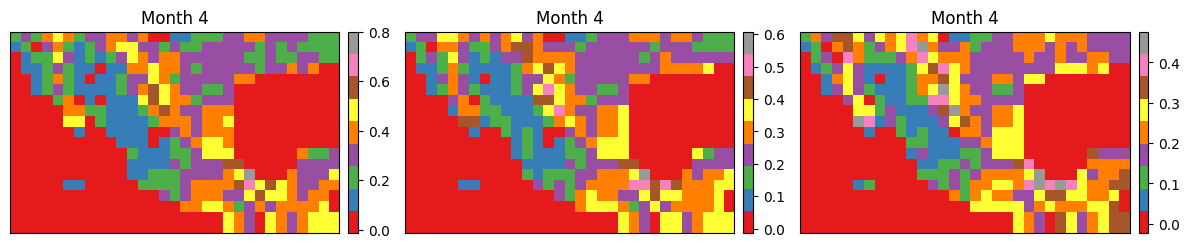

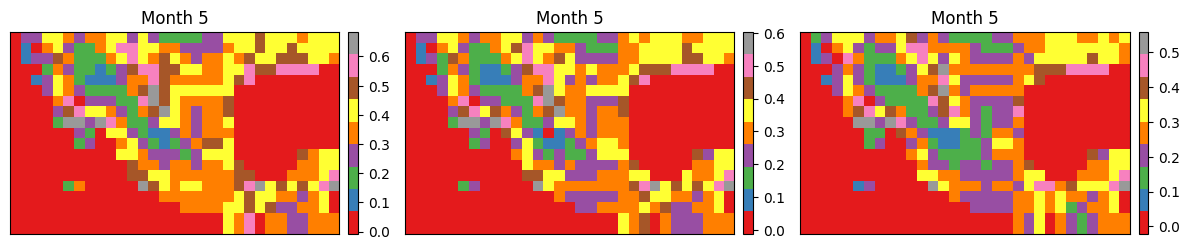

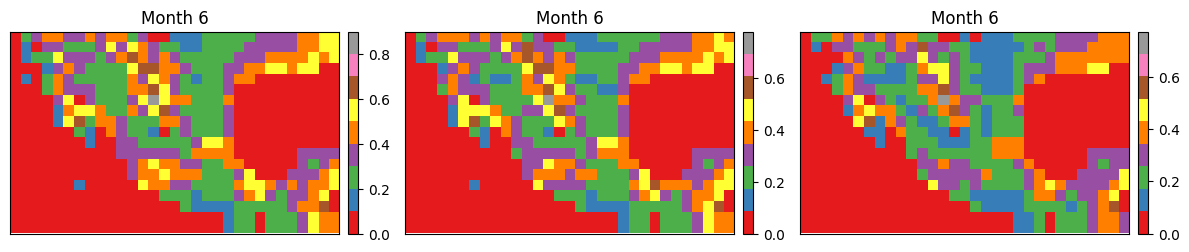

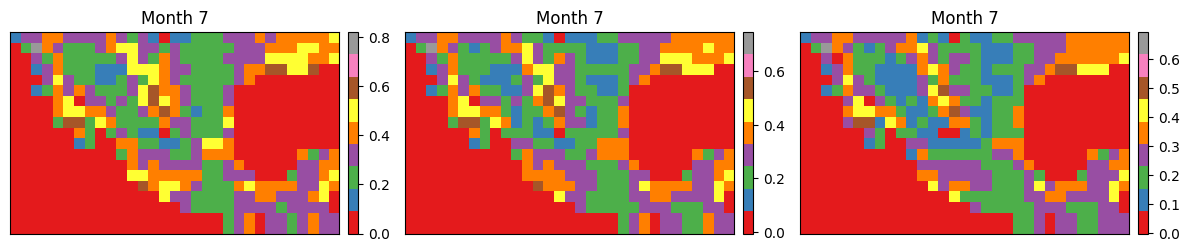

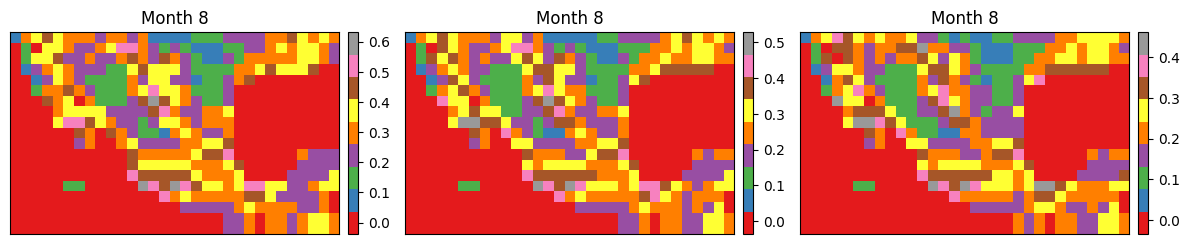

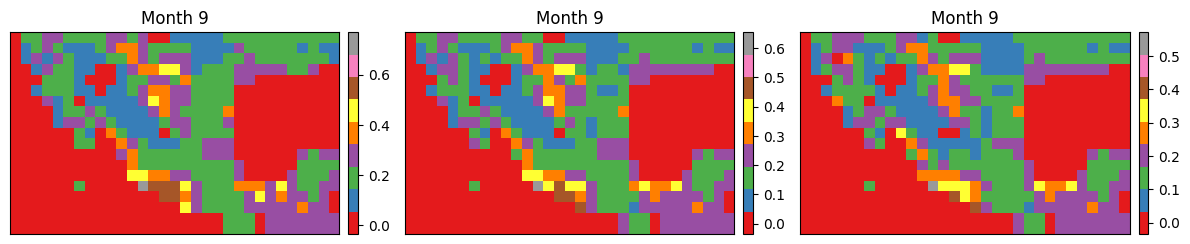

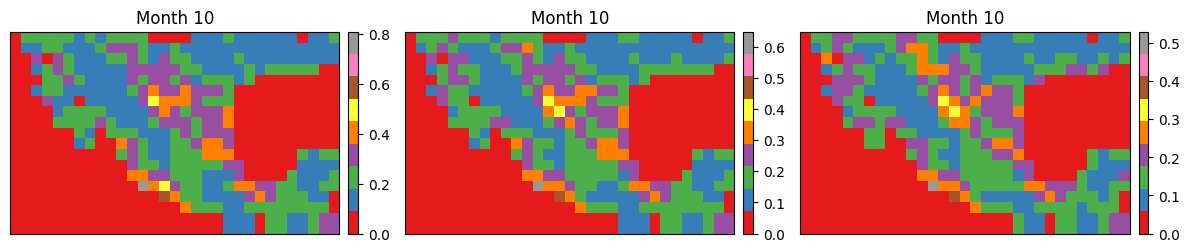

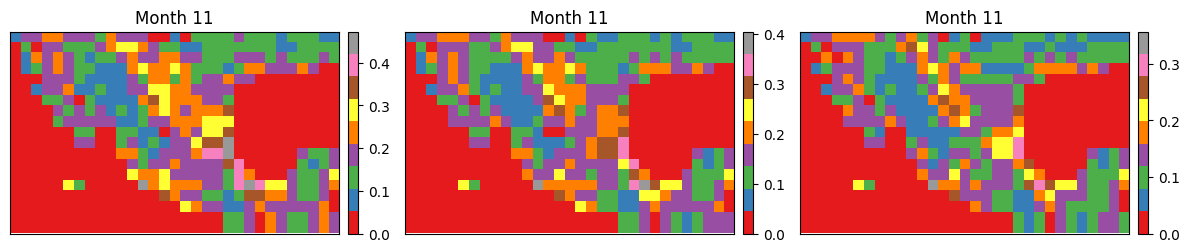

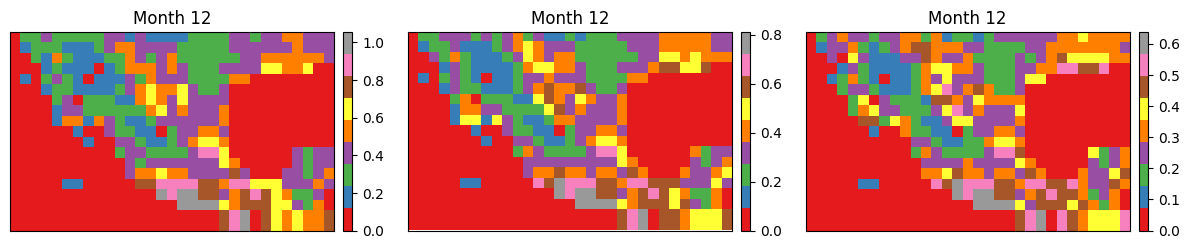

In [20]:
for i in range(NUM_DATASETS):
    ep.plot_bands(ds_aod_twelve_months[i], cmap="Set1", title=[f"Month {i+1}" for x in range(3)])


In [21]:
# Dimensions
NUM_BANDS, DIM_Y, DIM_X = ds_aod_twelve_months[0].shape[0], ds_aod_twelve_months[0].shape[1], ds_aod_twelve_months[0].shape[2]
print(f"Y: {DIM_Y}")
print(f"X: {DIM_X}")

Y: 19
X: 31


In [22]:
ds_aod_twelve_months.shape

(12, 3, 19, 31)

In [23]:
# Calculate mean for each band (1, 2, 3)
mean_2012 = []

for month in range(NUM_DATASETS):   # for each month
    bands = []
    for band in range(NUM_BANDS):       # for each band
        mean = 0.0
        for i in range(DIM_X):
            for j in range(DIM_Y):
                mean += ds_aod_twelve_months[month][band][j][i]     # mean for one band
        mean /= float((DIM_X * DIM_Y))
        bands.append(mean)
    mean_2012.append(bands)

In [24]:
mean_2012 = np.array(mean_2012)
mean_2012

array([[0.10890493, 0.08961121, 0.07563668],
       [0.12613413, 0.10388116, 0.08753481],
       [0.13590323, 0.11191681, 0.09447708],
       [0.17533787, 0.14426316, 0.12209678],
       [0.21680137, 0.18029882, 0.15424449],
       [0.21025128, 0.17760782, 0.1546944 ],
       [0.19592531, 0.16612564, 0.14487946],
       [0.17578269, 0.14793719, 0.12734636],
       [0.12999152, 0.10773175, 0.09096265],
       [0.13032938, 0.10706961, 0.08990663],
       [0.10847708, 0.08863498, 0.07403905],
       [0.25963499, 0.2113922 , 0.176854  ]])

In [25]:
mean_2012.shape

(12, 3)

In [26]:
# Band 1 mean
mean_b1 = mean_2012[:,0]
mean_b1

array([0.10890493, 0.12613413, 0.13590323, 0.17533787, 0.21680137,
       0.21025128, 0.19592531, 0.17578269, 0.12999152, 0.13032938,
       0.10847708, 0.25963499])

In [27]:
# Band 2 mean
mean_b2 = mean_2012[:,1]
mean_b2

array([0.08961121, 0.10388116, 0.11191681, 0.14426316, 0.18029882,
       0.17760782, 0.16612564, 0.14793719, 0.10773175, 0.10706961,
       0.08863498, 0.2113922 ])

In [28]:
# Band 3 mean
mean_b3 = mean_2012[:,2]
mean_b3

array([0.07563668, 0.08753481, 0.09447708, 0.12209678, 0.15424449,
       0.1546944 , 0.14487946, 0.12734636, 0.09096265, 0.08990663,
       0.07403905, 0.176854  ])

In [29]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'Novemeber', 'December']
months = np.array(months)

Text(0.02, 0.5, 'Corrected AOD (mean)')

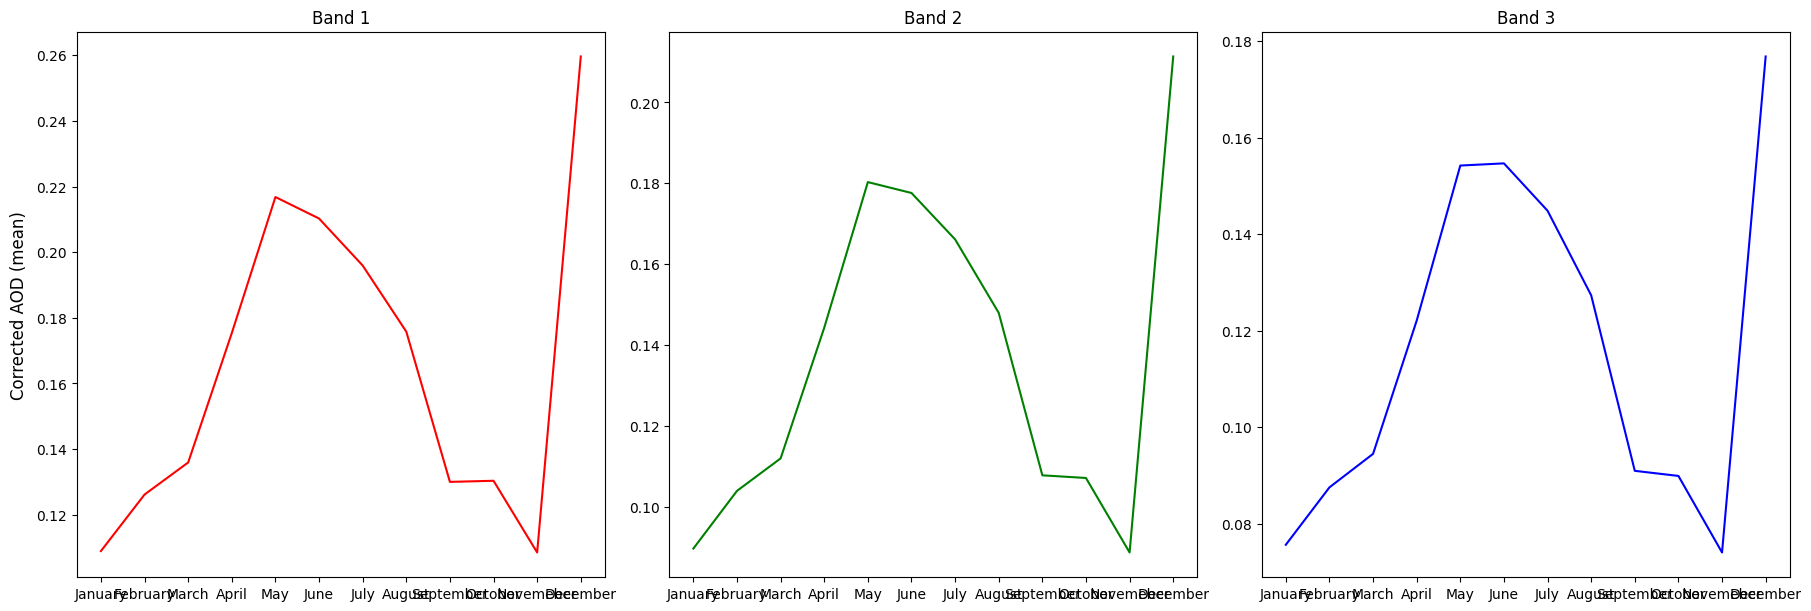

In [30]:
# Plot monthly mean in 2012
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x=months, y=mean_b1, color='r')
plt.title("Band 1")

b = plt.subplot(1, 3, 2)
sns.lineplot(x=months, y=mean_b2, color='g')
plt.title("Band 2")

c = plt.subplot(1, 3, 3)
sns.lineplot(x=months, y=mean_b3, color='b')
plt.title("Band 3")

fig.supylabel("Corrected AOD (mean)")


<Axes: >

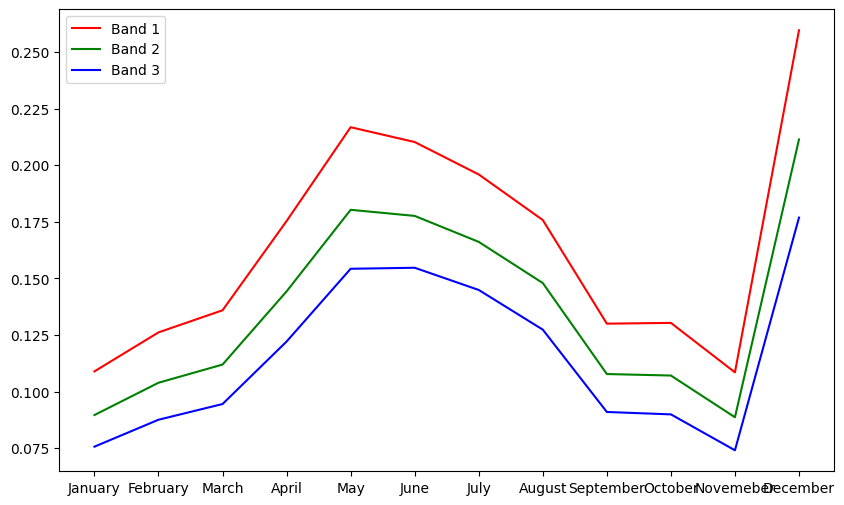

In [31]:
# Plot all bands in one
plt.figure(figsize=(10, 6))

sns.lineplot(x=months, y=mean_b1, color='r', label='Band 1')

sns.lineplot(x=months, y=mean_b2, color='g', label='Band 2')

sns.lineplot(x=months, y=mean_b3, color='b', label='Band 3')

### 2. Perform for all years

In [32]:
# Set path to Dataset folder
ds_years = []

for year in range(len(years)):
    folder_path = f"/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean/{years[year]}/"
    # Change the directory - Google Drive
    os.chdir(folder_path)
    print(f"Current workinf directory: {os.getcwd()}")

    # Read all 12 datasets from folder
    parent_path = folder_path
    files = os.listdir(parent_path)
    NUM_DATASETS = len(files)
    if any(".txt" in s for s in files):     # Check how many files are not HDF dataframes
        matching = [s for s in files if ".txt" in s]
        n_readmes = len(matching)
        NUM_DATASETS = NUM_DATASETS - n_readmes
        n_readmes = None
        matching = None
    print(f"Files in folder: {files}")
    print(f"Num files in folder: {NUM_DATASETS}")

    DATAFIELD_NAME='Aerosol_Optical_Depth_Land_Mean_Mean'
    scaling_not_read = True

    ds_aod_twelve_months = []   # To store only data for a year (12 months, 12 datasets)

    # For each month
    for i in range(NUM_DATASETS):
        path = parent_path + files[i]

        if (".hdf" in path):    # Ignore README files
            # Read file
            file = SD(path, SDC.READ,)

            if (scaling_not_read):
                SCALING = file.select(DATAFIELD_NAME).attributes()['scale_factor']
                scaling_not_read = True

            # Extract AOD Land Ocean into a pyHDF Dataset
            ds_i = file.select(DATAFIELD_NAME)

            # Get array values (pixels)
            arr_i = ds_i[:, :]

            # Use _FillValue (-9999.0) and set it to NaN for better visualization
            arr_i[arr_i == int(-9999)] = 0

            ds_aod_twelve_months.append(arr_i)

    ds_years.append(ds_aod_twelve_months)


Current workinf directory: /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/LAADS/Monthly/MOD08_M3_Aerosol_Optical_Depth_Land_Mean_Mean/2012
Files in folder: ['MOD08_M3.A2012001.061.2017332005900.psgscs_000502050761.hdf', 'MOD08_M3.A2012032.061.2017332052720.psgscs_000502050761.hdf', 'MOD08_M3.A2012061.061.2017332125551.psgscs_000502050761.hdf', 'MOD08_M3.A2012092.061.2017333070458.psgscs_000502050761.hdf', 'MOD08_M3.A2012153.061.2017335121954.psgscs_000502050761.hdf', 'MOD08_M3.A2012183.061.2017336234843.psgscs_000502050761.hdf', 'MOD08_M3.A2012214.061.2017338084514.psgscs_000502050761.hdf', 'MOD08_M3.A2012245.061.2017339022214.psgscs_000502050761.hdf', 'MOD08_M3.A2012275.061.2017339215337.psgscs_000502050761.hdf', 'MOD08_M3.A2012306.061.2017340192241.psgscs_000502050761.hdf', 'MOD08_M3.A2012336.061.2017341184807.psgscs_000502050761.hdf', 'MOD08_M3.A2012122.061.2017334103546.psgscs_000502050761.hdf']
Num files in folder: 12
Current workinf directory: /content/drive/M

In [33]:
ds_years = np.array(ds_years)

In [34]:
ds_years.shape

(11, 12, 3, 19, 31)

In [35]:
# Calculate mean for each band (1, 2, 3) for each month for each year

# Create iteration constants
NUM_YEARS = ds_years.shape[0]
NUM_MONTHS = ds_years.shape[1]

# Create array to store mean triplets (3 bands)
means = []

for year in range(NUM_YEARS):   # for each year
    mean_year = []
    for month in range(NUM_MONTHS):   # for each month
        bands = []
        for band in range(NUM_BANDS):       # for each band
            mean = 0.0
            for i in range(DIM_X):
                for j in range(DIM_Y):
                    mean += ds_years[year][month][band][j][i]
            mean /= float((DIM_X * DIM_Y))
            bands.append(mean)
        mean_year.append(bands)
    means.append(mean_year)

In [36]:
means = np.array(means)

In [37]:
means.shape

(11, 12, 3)

In [38]:
means

array([[[108.9049236 ,  89.61120543,  75.63667233],
        [126.13412564, 103.8811545 ,  87.53480475],
        [135.90322581, 111.91680815,  94.4770798 ],
        [175.33786078, 144.26315789, 122.09677419],
        [216.80135823, 180.29881154, 154.24448217],
        [210.25127334, 177.60780985, 154.69439728],
        [195.92529711, 166.12563667, 144.87945671],
        [175.78268251, 147.93718166, 127.34634975],
        [129.99151104, 107.73174873,  90.96264856],
        [130.32937182, 107.06960951,  89.90662139],
        [108.4770798 ,  88.63497453,  74.03904924],
        [259.63497453, 211.39219015, 176.85398981]],

       [[102.04414261,  83.23429542,  69.72665535],
        [ 99.79796265,  81.93887946,  68.96095076],
        [127.05772496, 105.37181664,  90.09677419],
        [302.05602716, 242.15789474, 198.11035654],
        [224.24957555, 187.88624788, 163.39898132],
        [170.71646859, 142.58064516, 121.94736842],
        [138.01867572, 113.59252971,  95.37691002],
        [1

In [39]:
means_year = means.reshape((11*12, 3))

In [40]:
# Scaling factor
means_year = means_year * SCALING

In [41]:
# Get yearly bands
mean_b1 = means_year[:,0]
mean_b2 = means_year[:,1]
mean_b3 = means_year[:,2]

In [42]:
mean_b1.shape

(132,)

In [43]:
#months_rep = np.array(([months]*11)).flatten()

In [44]:
months_rep = np.array([i+1 for i in range(11*12)])

In [45]:
months_rep.shape

(132,)

Text(0.02, 0.5, 'Corrected AOD (mean)')

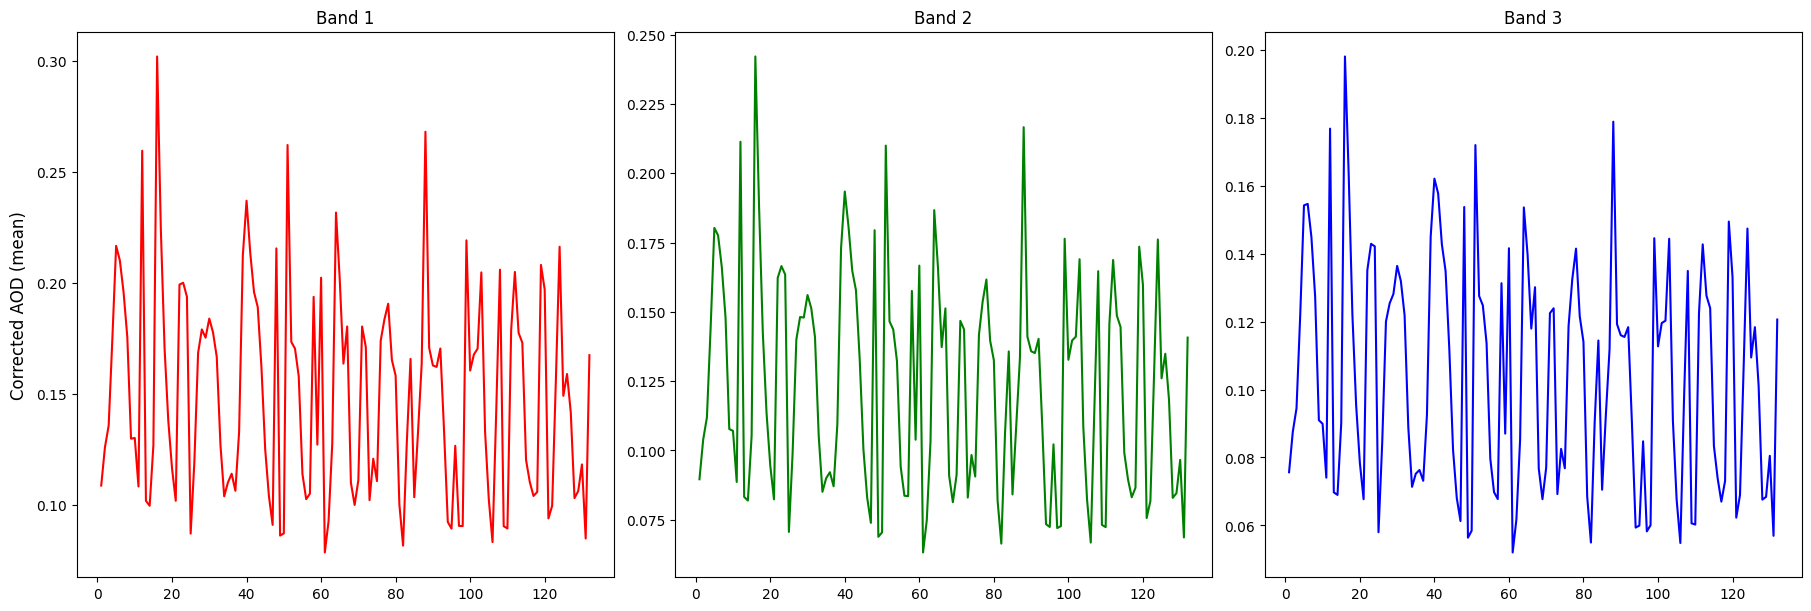

In [46]:
# Plot monthly mean in 2012-2022
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x=months_rep, y=mean_b1, color='r')
plt.title("Band 1")

b = plt.subplot(1, 3, 2)
sns.lineplot(x=months_rep, y=mean_b2, color='g')
plt.title("Band 2")

c = plt.subplot(1, 3, 3)
sns.lineplot(x=months_rep, y=mean_b3, color='b')
plt.title("Band 3")

fig.supylabel("Corrected AOD (mean)")


Text(0, 0.5, 'Corrected AOD')

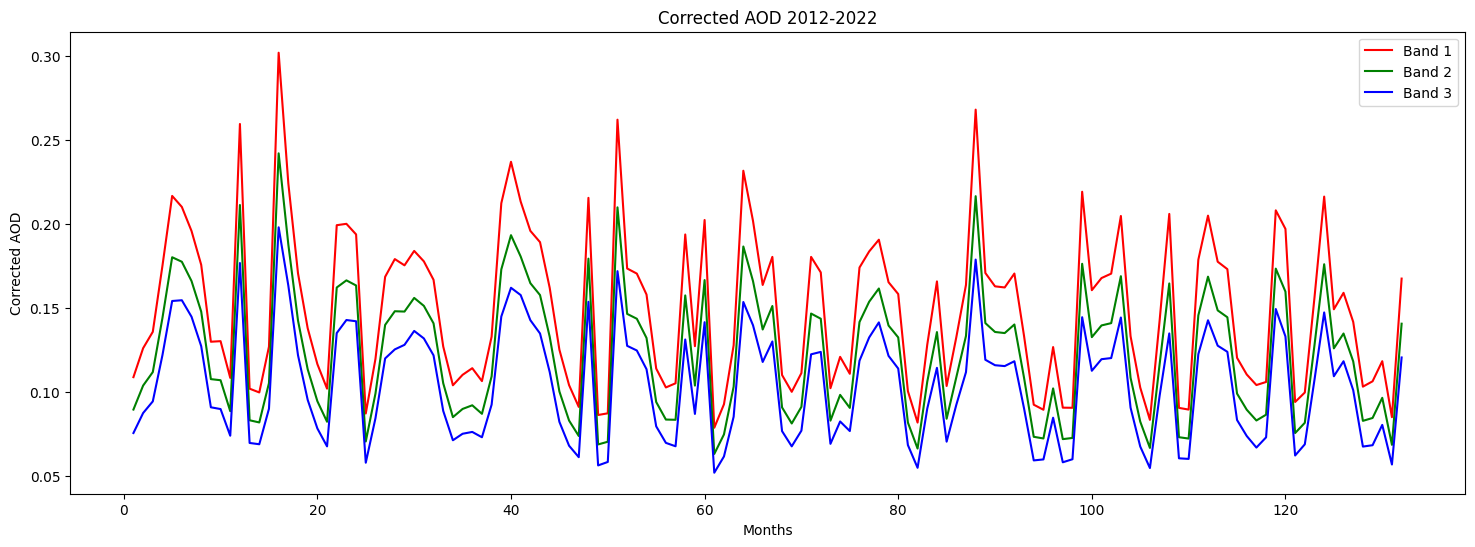

In [47]:
# Plot all bands in one
plt.figure(figsize=(18, 6))

sns.lineplot(x=months_rep, y=mean_b1, color='r', estimator='None', label='Band 1')

sns.lineplot(x=months_rep, y=mean_b2, color='g', estimator='None', label='Band 2')

sns.lineplot(x=months_rep, y=mean_b3, color='b', estimator='None', label='Band 3')

plt.title("Corrected AOD 2012-2022")
plt.xlabel("Months")
plt.ylabel("Corrected AOD")

<Axes: >

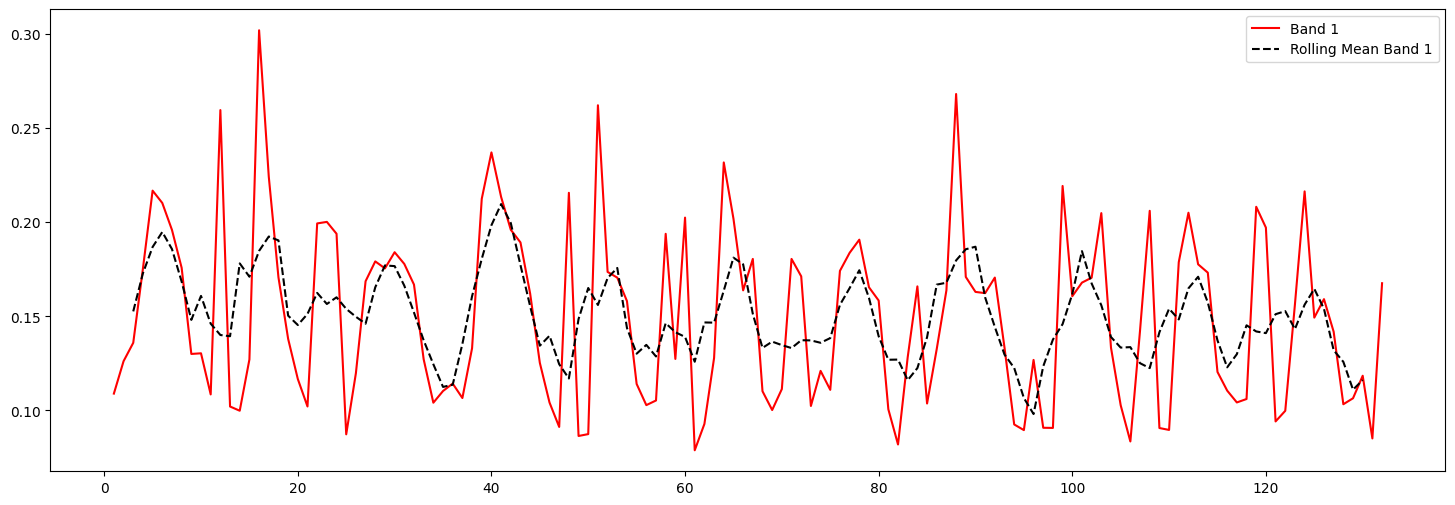

In [84]:
# Moving average
def moving_average(y, w):
    # y: AOD
    return np.convolve(y, np.ones(w), 'valid') / w

rolling_mean_b1 = moving_average(mean_b1, 5)

plt.figure(figsize=(18, 6))

sns.lineplot(x=months_rep, y=mean_b1, color='r', estimator='None', label='Band 1')
sns.lineplot(x=months_rep[2:-2], y=rolling_mean_b1, color='black', linestyle='--', estimator='None', label='Rolling Mean Band 1')


In [87]:
# Filtering
import statsmodels.api as sm

In [88]:
cycles_b1 = sm.tsa.filters.bkfilter(mean_b1, 1.5, 8, 3)

In [91]:
cycles_b1.shape

(126,)

<Axes: >

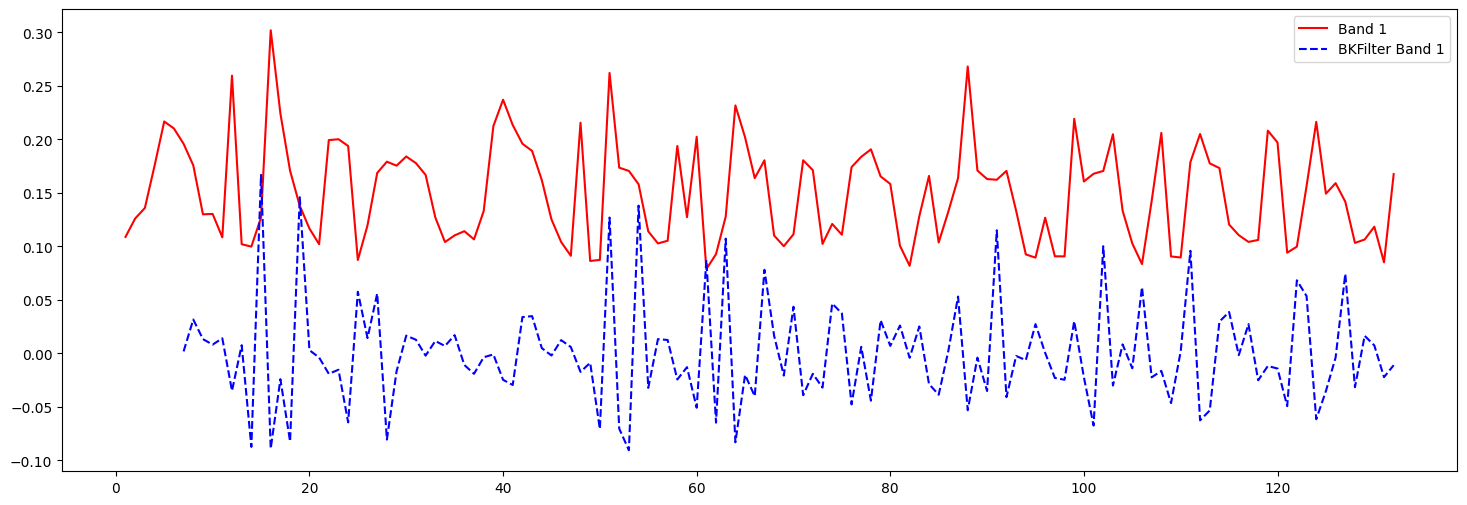

In [94]:
plt.figure(figsize=(18, 6))

sns.lineplot(x=months_rep, y=mean_b1, color='r', estimator='None', label='Band 1')
sns.lineplot(x=months_rep[6:], y=cycles_b1, color='blue', linestyle='--', estimator='None', label='BKFilter Band 1')

In [106]:
# Seaonal trend
from statsmodels.tsa.seasonal import STL

In [149]:
df_res_b1

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,123.000000,124.000000,125.000000,126.000000,127.000000,128.000000,129.000000,130.000000,131.000000,132.000000
1,0.108905,0.126134,0.135903,0.175338,0.216801,0.210251,0.195925,0.175783,0.129992,0.130329,...,0.156348,0.216404,0.149299,0.159115,0.141784,0.103253,0.106433,0.118406,0.085073,0.167586


Text(0.5, 0.98, 'STL decomposition AOD Band 1')

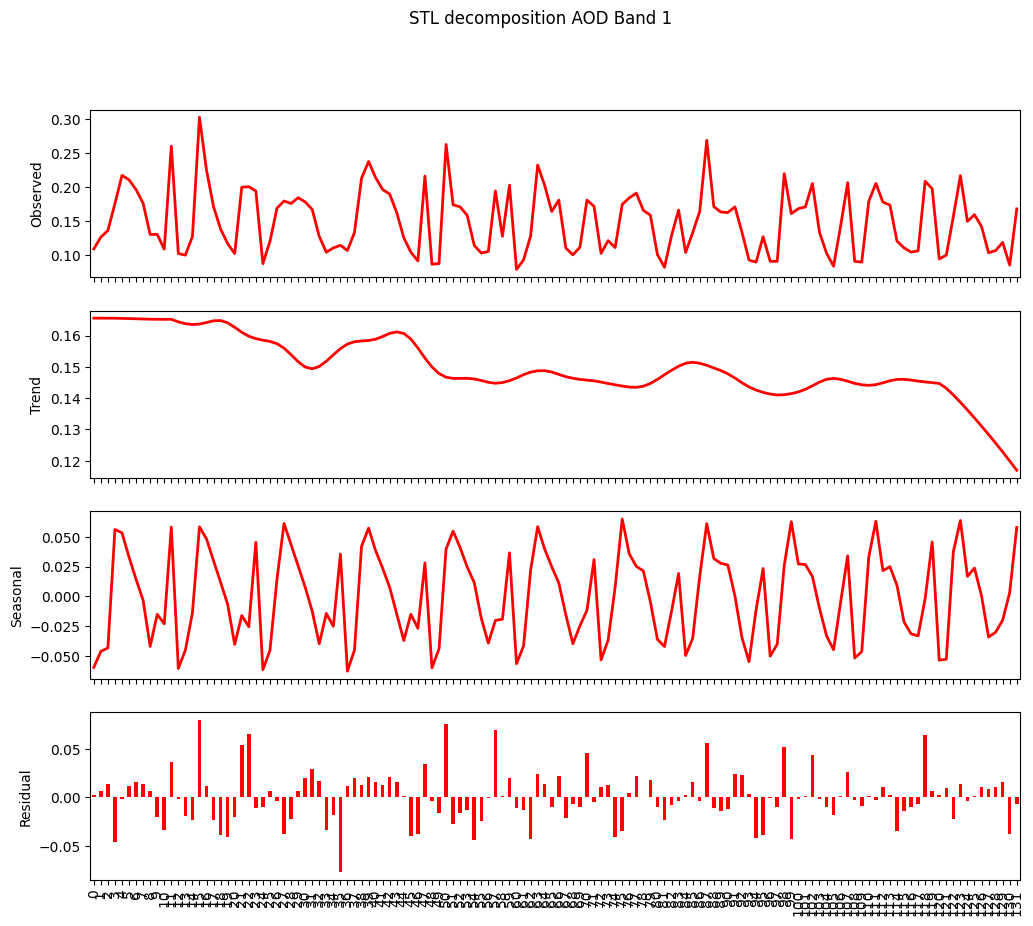

In [164]:
res_b1 = STL(mean_b1, period=12).fit()
res_b2 = STL(mean_b2, period=12).fit()
res_b3 = STL(mean_b3, period=12).fit()

fig, axes = plt.subplots(4, 1, sharex=True, label='d')

df_obs_b1 = pd.DataFrame(data=np.array(res_b1.observed))
df_obs_b1.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')

df_trn_b1 = pd.DataFrame(data=np.array(res_b1.trend))
df_trn_b1.plot(ax=axes[1], legend=False, color='r')
axes[1].set_ylabel('Trend')

df_sns_b1 = pd.DataFrame(data=np.array(res_b1.seasonal))
df_sns_b1.plot(ax=axes[2], legend=False, color='r')
axes[2].set_ylabel('Seasonal')

df_res_b1 = pd.DataFrame(data=np.array(res_b1.resid))
df_res_b1.plot(ax=axes[3], legend=False, kind='bar', color='r')
axes[3].set_ylabel('Residual')

fig.suptitle('STL decomposition AOD Band 1')


In [162]:
df_res_b1

,0
0,0.002880
1,0.006706
2,0.013649
3,-0.046238
4,-0.001996
...,...
127,0.009003
128,0.010900
129,0.015562
130,-0.038159


### Trend per month throughout period 2012-2022

In [49]:
# Get monthly data for complete time period
months_trend = []

for month in range(NUM_MONTHS):   # for each year
    month_bands = []
    for year in range(NUM_YEARS):   # for each month
        index = month + 12*year
        month_bands.append(means_year[index,:])
    months_trend.append(month_bands)

In [50]:
months_trend = np.array(months_trend)

In [51]:
months_trend[:,:,0].shape

(12, 11)

In [52]:
cmap_as_list1 = sns.diverging_palette(0, 300, center='dark', sep=10, as_cmap=True)(np.linspace(0, 1, 256))

In [53]:
cmap_as_list1[0]

array([0.8340245 , 0.23759253, 0.4133892 , 1.        ])

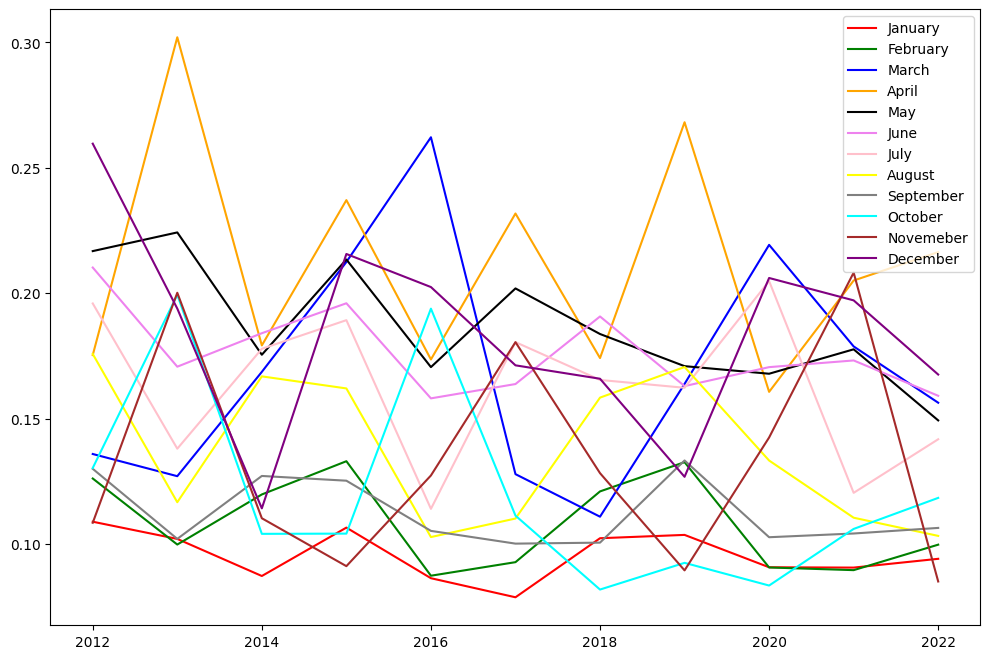

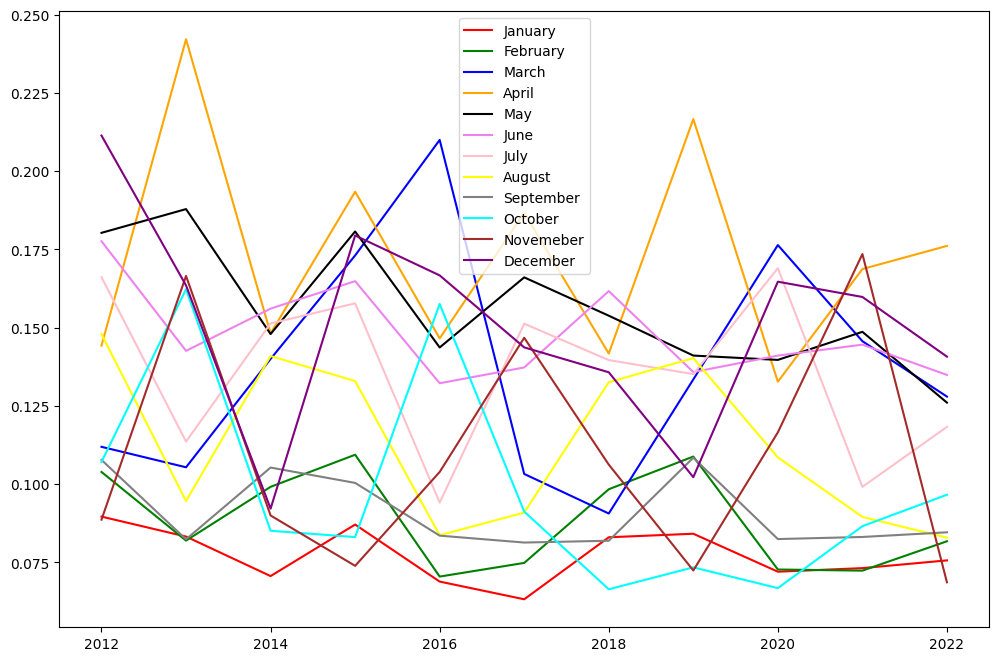

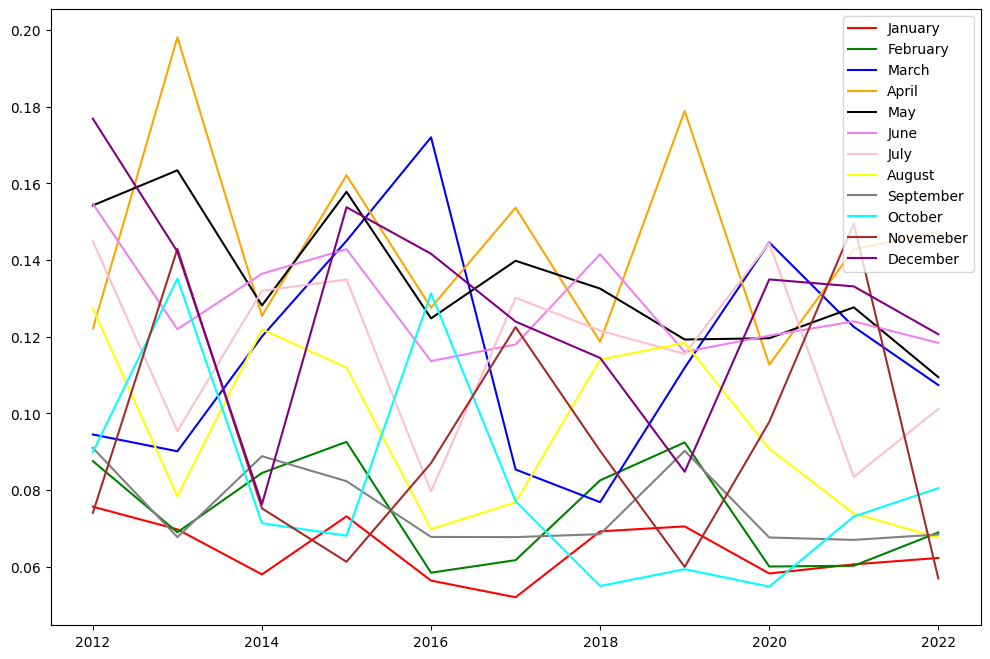

In [54]:
# Plot monthly trend throught years
colors = ['r', 'g', 'b', 'orange', 'black', 'violet', 'pink', 'yellow', 'gray', 'cyan', 'brown', 'purple']
plt.figure(figsize=(12, 8))

# Band 1
BAND_1 = 0
for month in range(months_trend[:,:,0].shape[0]):
    sns.lineplot(x=np.array([2012+i for i in range(NUM_YEARS)]), y=months_trend[:,:,BAND_1][month], color=colors[month], label=months[month])
plt.show()

plt.figure(figsize=(12, 8))

# Band 2
BAND_2 = 1
for month in range(months_trend[:,:,0].shape[0]):
    sns.lineplot(x=np.array([2012+i for i in range(NUM_YEARS)]), y=months_trend[:,:,BAND_2][month], color=colors[month], label=months[month])
plt.show()

plt.figure(figsize=(12, 8))

# Band 3
BAND_3 = 2
for month in range(months_trend[:,:,0].shape[0]):
    sns.lineplot(x=np.array([2012+i for i in range(NUM_YEARS)]), y=months_trend[:,:,BAND_3][month], color=colors[month], label=months[month])
plt.show()

Text(0.5, 1.0, 'Corrected AOD for Band 1 - Mexico Area Average Period 2012 - 2022')

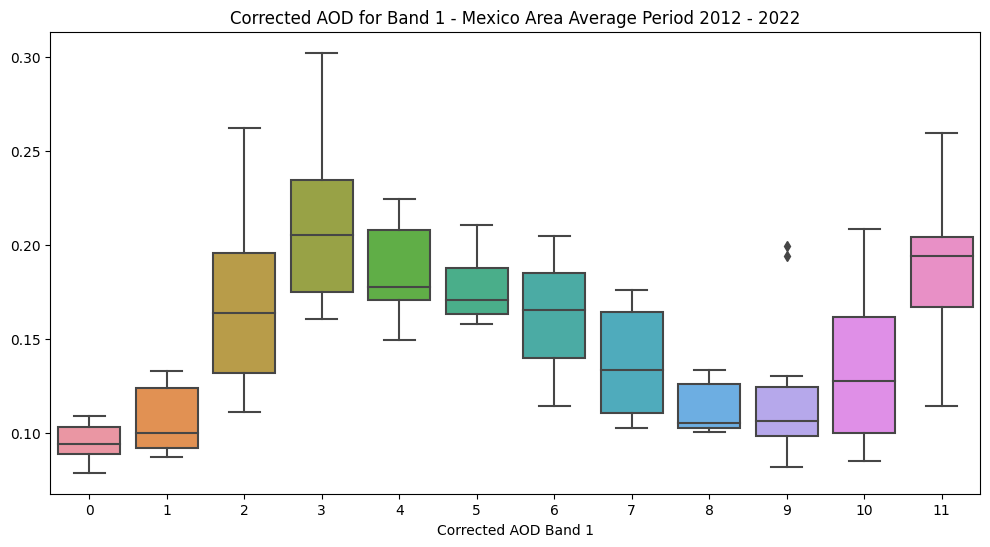

In [71]:
df_month_trend_b1 = pd.DataFrame(months_trend[:,:,BAND_1])
df_month_trend_b1 = df_month_trend_b1.transpose()
# Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(df_month_trend_b1)
plt.xlabel("Months")
plt.xlabel("Corrected AOD Band 1")
plt.title("Corrected AOD for Band 1 - Mexico Area Average Period 2012 - 2022")

Text(0.5, 1.0, 'Corrected AOD for Band 2 - Mexico Area Average Period 2012 - 2022')

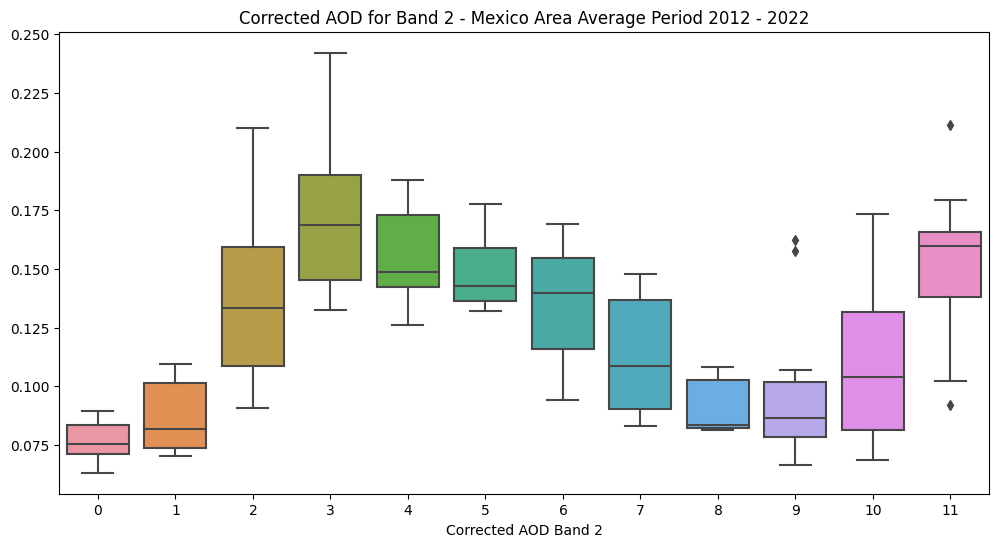

In [72]:
df_month_trend_b2 = pd.DataFrame(months_trend[:,:,BAND_2])
df_month_trend_b2 = df_month_trend_b2.transpose()
# Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(df_month_trend_b2)
plt.xlabel("Months")
plt.xlabel("Corrected AOD Band 2")
plt.title("Corrected AOD for Band 2 - Mexico Area Average Period 2012 - 2022")

Text(0.5, 1.0, 'Corrected AOD for Band 3 - Mexico Area Average Period 2012 - 2022')

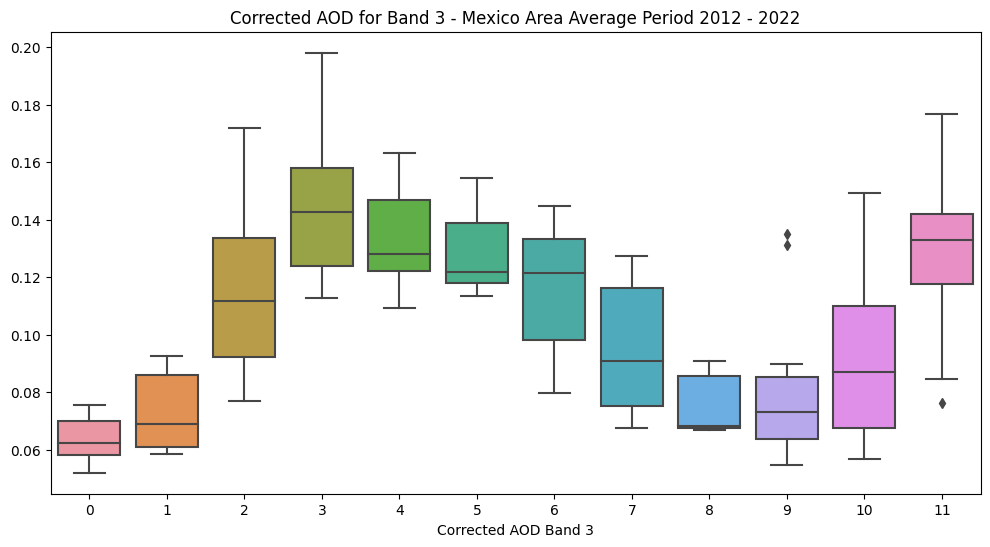

In [73]:
df_month_trend_b3 = pd.DataFrame(months_trend[:,:,BAND_3])
df_month_trend_b3 = df_month_trend_b3.transpose()
# Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(df_month_trend_b3)
plt.xlabel("Months")
plt.xlabel("Corrected AOD Band 3")
plt.title("Corrected AOD for Band 3 - Mexico Area Average Period 2012 - 2022")

In [55]:
# Find mean value per month
mean_month_trend = []
for month in range(NUM_MONTHS):   # for each year
    mean_month_trend.append([
        months_trend[:,:,BAND_1][month].mean(),
        months_trend[:,:,BAND_2][month].mean(),
        months_trend[:,:,BAND_3][month].mean()
        ])

In [56]:
mean_month_trend = np.array(mean_month_trend)
mean_month_trend.shape

(12, 3)

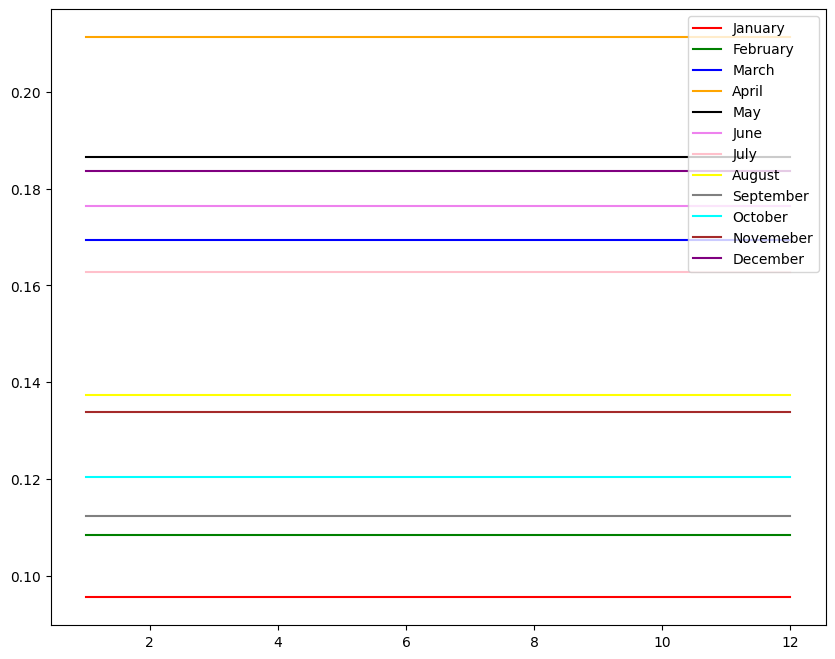

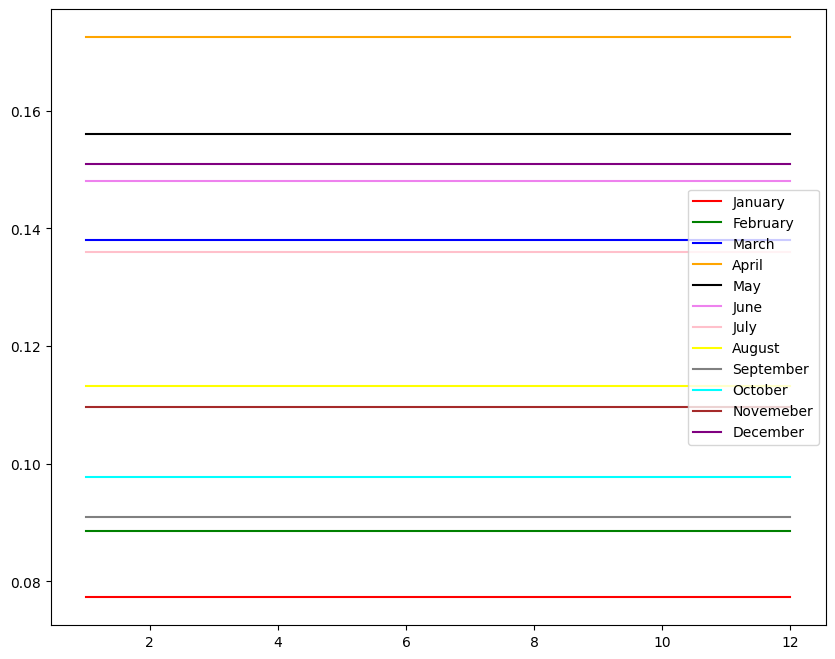

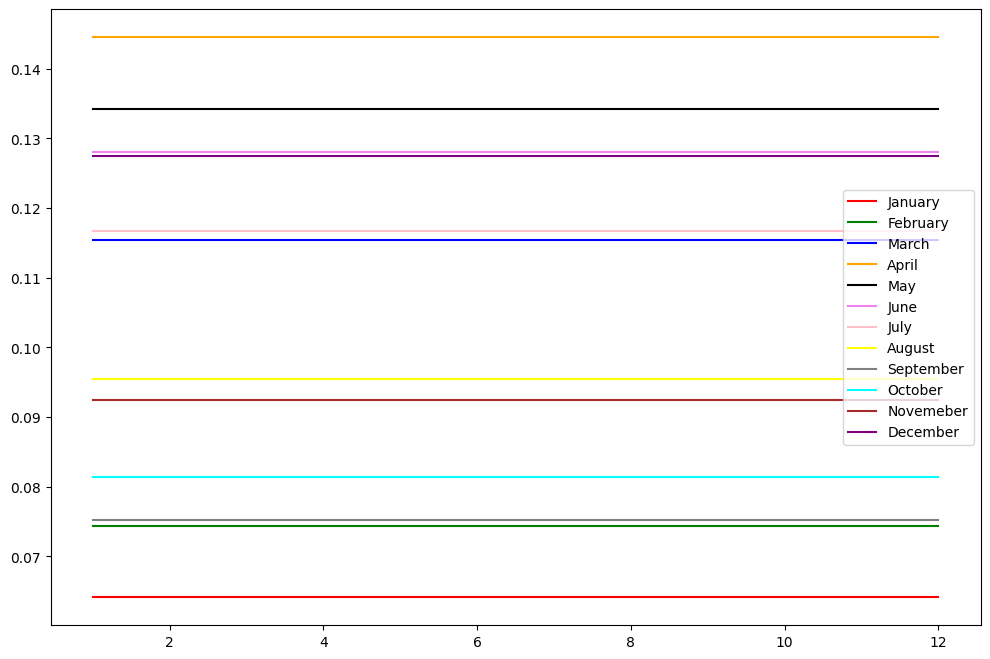

In [57]:
# Plot AOD mean in period 2012-2022 to compare if there are normal increases/decreases of AOD between months
colors = ['r', 'g', 'b', 'orange', 'black', 'violet', 'pink', 'yellow', 'gray', 'cyan', 'brown', 'purple']
plt.figure(figsize=(10, 8))

# Band 1
for month in range(mean_month_trend[:,0].shape[0]):
    sns.lineplot(x=np.array([i+1 for i in range(NUM_MONTHS)]), y=mean_month_trend[:,BAND_1][month], color=colors[month], label=months[month])
plt.show()

plt.figure(figsize=(10, 8))

# Band 2
BAND_2 = 1
for month in range(months_trend[:,:,0].shape[0]):
    sns.lineplot(x=np.array([i+1 for i in range(NUM_MONTHS)]), y=mean_month_trend[:,BAND_2][month], color=colors[month], label=months[month])
plt.show()

plt.figure(figsize=(12, 8))

# Band 3
BAND_3 = 2
for month in range(months_trend[:,:,0].shape[0]):
    sns.lineplot(x=np.array([i+1 for i in range(NUM_MONTHS)]), y=mean_month_trend[:,BAND_3][month], color=colors[month], label=months[month])
plt.show()